In [78]:
import pandas as pd
from sklearn.datasets import load_iris
irish=load_iris()
irish.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [79]:
irish.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
df=pd.DataFrame(irish.data,columns=irish.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
df['target']=irish.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [82]:
df['flower_names']=df.target.apply(lambda x: irish.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [83]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]


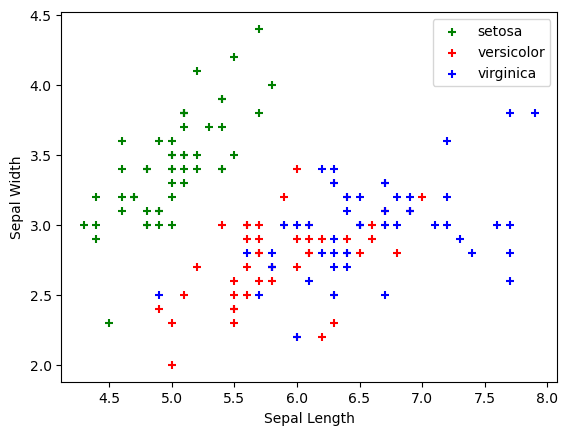

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='+', label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', marker='+', label='virginica')

plt.legend()  # Add this to display the labels

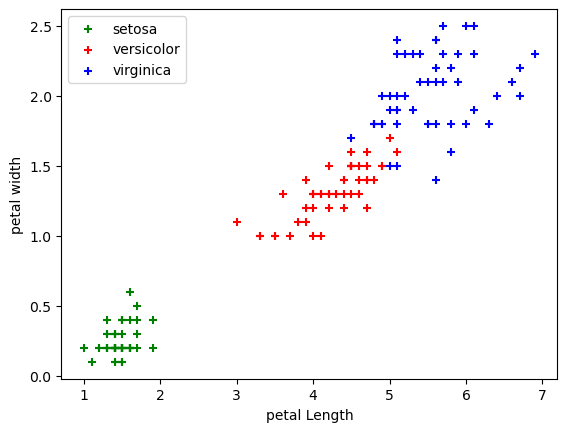

In [85]:
plt.xlabel('petal Length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='green',marker='+', label='setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='red',marker='+',label='versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='blue',marker='+',label='virginica')

plt.legend()


In [86]:
from sklearn.model_selection import train_test_split

X=df.drop(['target','flower_names'],axis='columns')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
Y=df['target']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [88]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
model=SVC()
model.fit(x_train,y_train)
pr=pd.DataFrame(model.predict(x_test))
pr

,0
0,0
1,1
2,2
3,0
4,0
5,0
6,0
7,1
8,0
9,2


In [89]:
model.score(x_test,y_test)

1.0

For ovefit regularization of support vectro machine model
we use C to indicate the regularization value

In [90]:
model_C=SVC(C=10)
model_C.fit(x_train,y_train)
model_C.score(x_test,y_test)

1.0

For  highvalue or lowvalue gamafitting 

In [91]:
model_g=SVC(gamma=7)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9666666666666667

SVC kernal model

In [92]:
model_lkarnal=SVC(kernel='linear')
model_lkarnal.fit(x_train,y_train)
model_lkarnal.score(x_test,y_test)

1.0